In [198]:
import pandas as pd

cars = pd.read_csv('cars.csv')
brand = pd.read_csv('brand.csv')

In [199]:
cars.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [200]:
brand.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


In [201]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 374.6+ KB


In [202]:
cars.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3687.000000,3.687000e+03,3687.000000,2276.000000,3662.000000,3652.000000
mean,5787.301058,8.132854e+04,2011.846216,2.807557,4.321409,4.900329
std,4480.629885,3.941718e+04,5.082387,1.546028,0.986760,0.577046
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.500000,4.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,5.000000,7.000000


In [203]:
cars.isnull().sum()

title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3147
dtype: int64

In [204]:
# 1-1. cars.csv와 brand.csv의 데이터 합치기
cars['brand'] = cars['title'].str.split().str[0].str.lower()

In [205]:
cars_merged = pd.merge(cars, brand, how='left', left_on='brand', right_on='title')
cars_merged

,title_x,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,title_y,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,skoda,skoda,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,vauxhall,vauxhall,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,hyundai,hyundai,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,mini,mini,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,vauxhall,vauxhall,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,renault,renault,France
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,audi,audi,Germany
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,bmw,bmw,Germany
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,honda,honda,Japan


In [206]:
cars_merged = cars_merged.drop(columns=['title_y'], errors='ignore')
cars_merged = cars_merged.rename(columns={'title_x': 'title'} if 'title_x' in cars_merged.columns else cars_merged)
cars_merged

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,skoda,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,vauxhall,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,hyundai,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,mini,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,vauxhall,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,renault,France
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,audi,Germany
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,bmw,Germany
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,honda,Japan


In [207]:
# 1-2. 카테고리형 변수를 숫자 형태로 변환하기
# [힌트] Engine, Emission Class 변수에 주목하세요!
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
 13  brand              3687 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 403.4+ KB


In [208]:
cars['Engine'] = cars['Engine'].str.split('L').str[0]
cars['Emission Class'] = cars['Emission Class'].str.split(' ').str[1]
cars

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,NaN,skoda
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4,Full,vauxhall
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5,NaN,hyundai
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4,Full,mini
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5,NaN,vauxhall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4,NaN,renault
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0,Manual,4.0,5.0,5,NaN,audi
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0,Manual,4.0,5.0,5,NaN,bmw
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2,Manual,5.0,5.0,4,Full,honda


In [209]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
 13  brand              3687 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 403.4+ KB


In [210]:
cars['Engine'] = cars['Engine'].astype(float)
cars['Emission Class'] = cars['Emission Class'].astype(float)
cars

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,NaN,skoda
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,vauxhall
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,NaN,hyundai
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,mini
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,NaN,vauxhall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4.0,NaN,renault
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0,Manual,4.0,5.0,5.0,NaN,audi
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0,Manual,4.0,5.0,5.0,NaN,bmw
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2,Manual,5.0,5.0,4.0,Full,honda


In [211]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   float64
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   float64
 12  Service history    540 non-null    object 
 13  brand              3687 non-null   object 
dtypes: float64(5), int64(3), object(6)
memory usage: 403.4+ KB


In [212]:
cars = cars.rename(columns = {
    'Engine': 'Engine(L)',
    'Emission Class': 'Euro Emission Class'
})
cars

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine(L),Gearbox,Doors,Seats,Euro Emission Class,Service history,brand
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,NaN,skoda
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,vauxhall
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,NaN,hyundai
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,mini
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,NaN,vauxhall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4.0,NaN,renault
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0,Manual,4.0,5.0,5.0,NaN,audi
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0,Manual,4.0,5.0,5.0,NaN,bmw
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2,Manual,5.0,5.0,4.0,Full,honda


In [213]:
# 1-3. 결측치 처리하기
cars.isnull().sum()

title                     0
Price                     0
Mileage(miles)            0
Registration_Year         0
Previous Owners        1411
Fuel type                 0
Body type                 0
Engine(L)                45
Gearbox                   0
Doors                    25
Seats                    35
Euro Emission Class      87
Service history        3147
brand                     0
dtype: int64

In [214]:
# Service history 변수의 결측치는 'Unknown'으로 채우기
cars['Service history'] = cars['Service history'].fillna('unknown')
cars['Service history']

0       unknown
1          Full
2       unknown
3          Full
4       unknown
         ...   
3682    unknown
3683    unknown
3684    unknown
3685       Full
3686    unknown
Name: Service history, Length: 3687, dtype: object

In [215]:
cars.isnull().sum(axis=1).value_counts().sort_index()

0    2239
1    1368
2      19
3      48
4      12
5       1
Name: count, dtype: int64

In [216]:
# 결측치가 2개 이상인 행 제거
cars = cars[cars.isnull().sum(axis=1) < 2]

In [217]:
# 1-4. Scaler 활용해보기
from sklearn.preprocessing import MinMaxScaler

scale_cols = ['Price', 'Mileage(miles)', 'Registration_Year', 'Engine(L)']

cars_scaled = cars[scale_cols].dropna()

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(cars_scaled)

scaled_df = pd.DataFrame(scaled_values, columns = scale_cols)

scaled_df.head()

,Price,Mileage(miles),Registration_Year,Engine(L)
0,0.194030,0.063227,0.805556,0.109091
1,0.032687,0.079798,0.583333,0.072727
2,0.016388,0.123412,0.666667,0.109091
3,0.059552,0.087136,0.638889,0.109091
4,0.017910,0.076569,0.722222,0.090909


In [218]:
scaled_df.describe()

,Price,Mileage(miles),Registration_Year,Engine(L)
count,3606.000000,3606.000000,3606.000000,3606.000000
mean,0.160947,0.073463,0.692403,0.146165
std,0.134587,0.035618,0.133141,0.088279
min,0.000000,0.000000,0.000000,0.000000
25%,0.062388,0.051331,0.583333,0.090909
50%,0.107463,0.072065,0.694444,0.145455
75%,0.226836,0.092964,0.805556,0.200000
max,1.000000,1.000000,1.000000,1.000000


In [219]:
# Price
# -> 평균이 0.16, 중앙값(50%)도 0.10인 걸 보면, 대부분의 중고차가 저가 차량
# -> 상위 25%에 해당하는 값도 0.22밖에 안되니까 1.0 근처의 고가 차량은 소수
# Mileage(miles)
# -> 평균이 0.07로 매우 낮음 = 대부분 적게 탄 차
# -> 상위 25%도 0.09 정도 → 고주행 차량은 극히 일부
# Registration_Year
# -> 중앙값 0.69 → 비교적 중간 연식이 많긴 하지만
# -> 75%가 0.805 이하 = 최신 차량은 상위 25%뿐 → 전체적으로는 **오래된 차량이 더 많음**
# Engine(L)
# -> 배기량 평균 0.14 수준으로 비교적 작은 차 위주
# -> 소형차 위주인 데이터라는 것을 추정 가능

In [220]:
# 1-5. 기존 데이터의 정보 70% 이상을 가지는 수준에서 최소한의 주성분 추출 (PCA)
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_df)

explained_var_ratio = pca.explained_variance_ratio_ 
explained_var_ratio

array([0.72349245, 0.19276465, 0.06662148, 0.01712143])

In [221]:
import numpy as np
cumulative = np.cumsum(explained_var_ratio)
cumulative

array([0.72349245, 0.91625709, 0.98287857, 1.        ])

In [222]:
n_components_70 = np.argmax(cumulative >= 0.7) +1
n_components_70

np.int64(1)

In [223]:
pca = PCA(n_components=2)
pca

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [224]:
pca_result = pca.fit_transform(scaled_df)
pca_result

array([[ 0.10750382, -0.04712253],
       [-0.15819618, -0.08922724],
       [-0.11992503, -0.07951037],
       ...,
       [-0.03008819,  0.03998881],
       [-0.20885168,  0.08335582],
       [-0.04988688, -0.11594189]], shape=(3606, 2))

In [225]:
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df

,PC1,PC2
0,0.107504,-0.047123
1,-0.158196,-0.089227
2,-0.119925,-0.079510
3,-0.105443,-0.058845
4,-0.073027,-0.111098
...,...,...
3601,-0.206169,-0.013498
3602,0.014735,0.079715
3603,-0.030088,0.039989
3604,-0.208852,0.083356


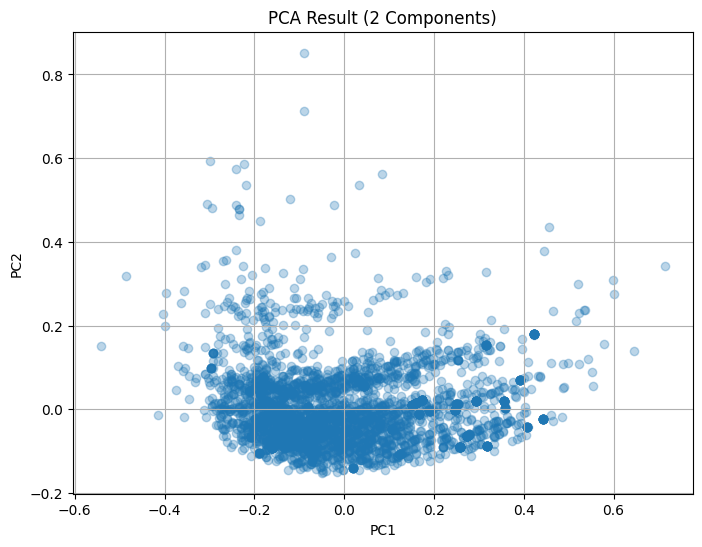

In [226]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.3)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Result (2 Components)')
plt.grid(True)
plt.show()



In [227]:
# 대부분의 차량이 0 근처 또는 음수 영역에 분포
# -> 고가 차량이나 특이한 차량은 적고, 평균~저렴한 중고차가 많다

In [228]:
import pandas as pd

components_df = pd.DataFrame(
    pca.components_,
    columns=scaled_df.columns,
    index=['PC1', 'PC2']
)
components_df

,Price,Mileage(miles),Registration_Year,Engine(L)
PC1,0.697630,-0.104929,0.699735,-0.112572
PC2,0.385884,0.066722,-0.231448,0.890547


In [229]:
# PC1
# -> 가격이 높고, 신차일수록(연식 큼) → PC1 점수 ↑
# -> 주행거리나 배기량은 영향이 작음
# PC2
# 배기량이 큰 차일수록 PC2 ↑
# **연식이 낮을수록(오래된 차)**도 PC2 ↑

In [230]:
cars_merged.columns

Index(['title', 'Price', 'Mileage(miles)', 'Registration_Year',
       'Previous Owners', 'Fuel type', 'Body type', 'Engine', 'Gearbox',
       'Doors', 'Seats', 'Emission Class', 'Service history', 'brand',
       'country'],
      dtype='object')

In [231]:
pca_with_country = pd.concat([pca_df[['PC1', 'PC2']], cars_merged[['country']]], axis = 1)
pca_with_country

,PC1,PC2,country
0,0.107504,-0.047123,Czech Republic
1,-0.158196,-0.089227,United Kingdom
2,-0.119925,-0.079510,South Korea
3,-0.105443,-0.058845,United Kingdom
4,-0.073027,-0.111098,United Kingdom
...,...,...,...
3682,NaN,NaN,France
3683,NaN,NaN,Germany
3684,NaN,NaN,Germany
3685,NaN,NaN,Japan


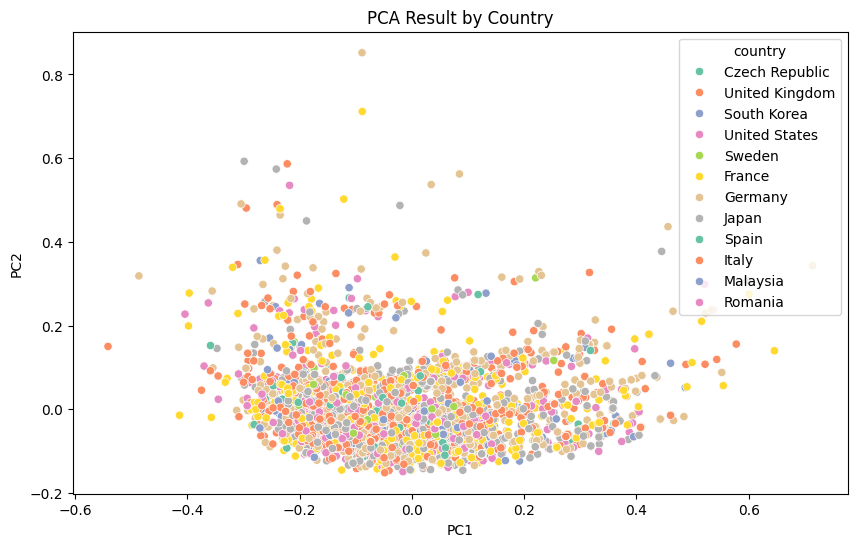

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_with_country, x='PC1', y='PC2', hue='country', palette='Set2')
plt.title('PCA Result by Country')
plt.show()

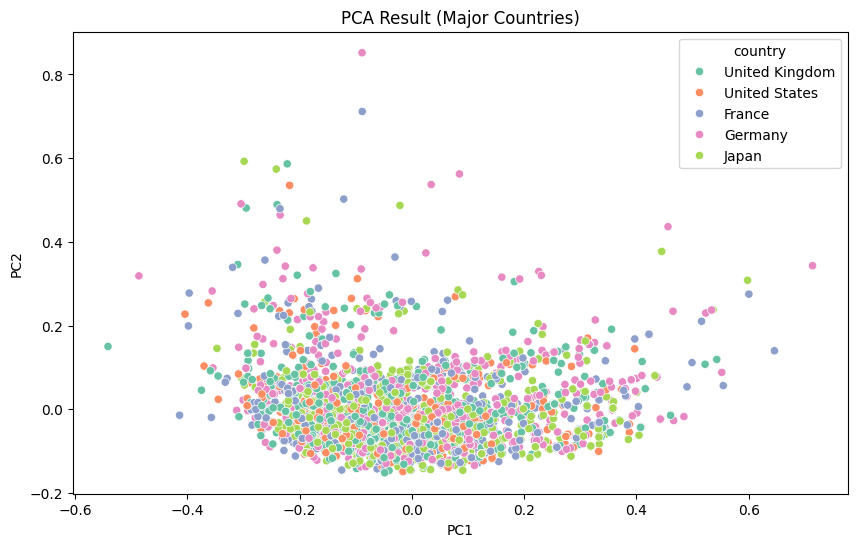

In [233]:
major_countries = ['Germany', 'Japan', 'United States', 'United Kingdom', 'France']
subset = pca_with_country[pca_with_country['country'].isin(major_countries)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset, x='PC1', y='PC2', hue='country', palette='Set2')
plt.title('PCA Result (Major Countries)')
plt.show()


In [234]:
# 2-1. 국가별 총 브랜드 개수는?
brand_counts = cars_merged.groupby('country')['brand'].nunique().reset_index()
brand_counts.columns = ['country', 'num_brands']

brand_counts.sort_values(by = 'num_brands', ascending=False).reset_index(drop=True)
brand_counts.index = brand_counts.index + 1

brand_counts

,country,num_brands
1,Czech Republic,1
2,France,4
3,Germany,6
4,Italy,4
5,Japan,11
6,Malaysia,1
7,Romania,1
8,South Korea,4
9,Spain,1
10,Sweden,2


In [237]:
# 2-2. 상관관계가 높은 변수들이 있는지 확인해보세요.
numeric_cols = cars_merged.select_dtypes(include='number')

In [241]:
corr_matrix = numeric_cols.corr()
corr_matrix

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
Price,1.000000,-0.500358,0.722971,-0.479424,0.113335,-0.027393
Mileage(miles),-0.500358,1.000000,-0.410781,0.316160,-0.037024,0.095271
Registration_Year,0.722971,-0.410781,1.000000,-0.501045,0.219365,0.037166
Previous Owners,-0.479424,0.316160,-0.501045,1.000000,-0.153262,-0.029338
Doors,0.113335,-0.037024,0.219365,-0.153262,1.000000,0.497160
Seats,-0.027393,0.095271,0.037166,-0.029338,0.497160,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

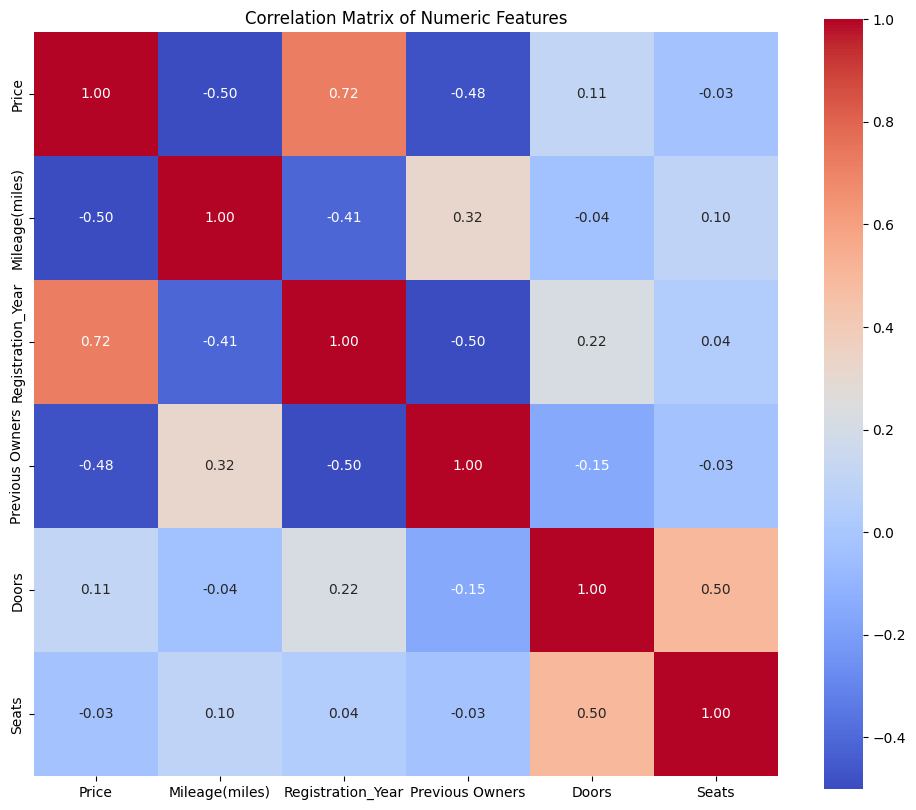

In [246]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show